## RockPy 1

RockPy is a currently developed software framework to analyze and visualize different types of measurements. It's is written by Michael Volk and Michael Wack and not stable yet. Therefore it is important to realize that the functionality will probably change with future revisions and break the example shown below.
The project (including older revisions) is available at https://github.com/Grossstadtlegende/RockPyV3

This notebook runs with RockPy3 revision: 'ab297be-dirty'

to see the revision, use RockPy3.getgitrevision()

---

### Getting Started

In [1]:
%pylab inline
import warnings
import sys
import logging
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


#### first we need to import RockPy

In [27]:
import RockPy3
RockPy3.logger.setLevel(logging.ERROR) # set logger level so not all info is shown
print(RockPy3.getgitrevision())

b'ab297be-dirty'


#### a **study** is a "container" for samples

In [3]:
Study1 = RockPy3.RockPyStudy()

#### you can add samples to it or create samplegroups

In [4]:
s = Study1.add_sample(name='S1', mass=10, mass_unit='mg')

### importing data

3. fpath: path to the file
1. mtype: measurement type (e.g. hysteresis, backfield)
2. ftype: file type (e.g. vsm, vftb, sushibar)
4. **optional** series, color, linestyle ...

In [5]:
hys_vsm = s.add_measurement(fpath='/Users/mike/Google Drive/__code/RockPy3/testing/test_data/hys_vsm.001', 
                            mtype='hysteresis', 
                            ftype='vsm')

coe = s.add_measurement(fpath='/Users/mike/Google Drive/__code/RockPy3/testing/test_data/coe_vsm.001', 
                        mtype='backfield', 
                        ftype='vsm')

#### you can see what you have added to a *study* with info()

In [6]:
print(Study1.info())

20151209:1314
------------------  ------------
1 samples           S1
------------------  ----
1 measurements      hysteresis
                    1 series:
                    none: nan[1]
1 measurements      mass
                    1 series:
                    none: nan[1]
1 measurements      backfield
                    1 series:
                    none: nan[1]
------------------  ----

Sample Name      Sample Group     Measurements                          series           Initial State
---------------  ---------------  ------------------------------------  ---------------  ---------------
S1               none             1x hysteresis, 1x mass, 1x backfield  none             False
===============  ===============  ===============                       ===============  ===============
                 S1               mass [0]                              none [nan]
                 S1               hysteresis [1]                        none [nan]
                 S1           

### calculating results

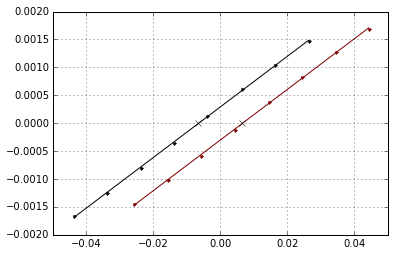

(0.0065497062452085277, 0.00012679665605071309)

In [7]:
hys_vsm.result_bc(no_points=8, check=True)

changing the recipe for the calculation with:

In [8]:
hys_vsm.set_recipe(result='bc', recipe='nonlinear')

No we use a non linear fit.

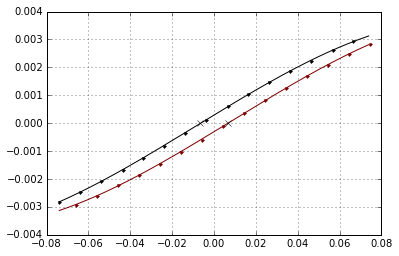

(0.0065855376276276328, 0.00014798960960961394)

In [9]:
hys_vsm.result_bc(no_points=15, check=True)

### importing a different ftype

You can import multiple filtypes and use them in a study. Here we import a MPMS hysteresis. Manipulating the data, however is the same as for the example before.

In [10]:
s2 = Study1.add_sample(name='Pyrrhotite')
hys_mpms = s2.add_measurement(fpath='/Users/mike/Google Drive/__code/RockPy3/testing/test_data/hys_mpms.001',
                             mtype='hysteresis', 
                             ftype ='mpms')

In [11]:
print(Study1.info())

20151209:1314
------------------  --------------------------
2 samples           Pyrrhotite,S1
------------------  --------------------------
2 measurements      hysteresis
                    1 series:
                    none: nan[2]
1 measurements      mass
                    1 series:
                    none: nan[1]
1 measurements      backfield
                    1 series:
                    none: nan[1]
------------------  --------------------------

Sample Name      Sample Group     Measurements                          series           Initial State
---------------  ---------------  ------------------------------------  ---------------  ---------------
Pyrrhotite       none             1x hysteresis                         none             False
===============  ===============  ===============                       ===============  ===============
                 Pyrrhotite       hysteresis [0]                        none [nan]
---------------  ---------------  ----------

### The Figure
#### a figure consists of visuals, you can have as many as you want
#### each visual consists of features, specific to the visual

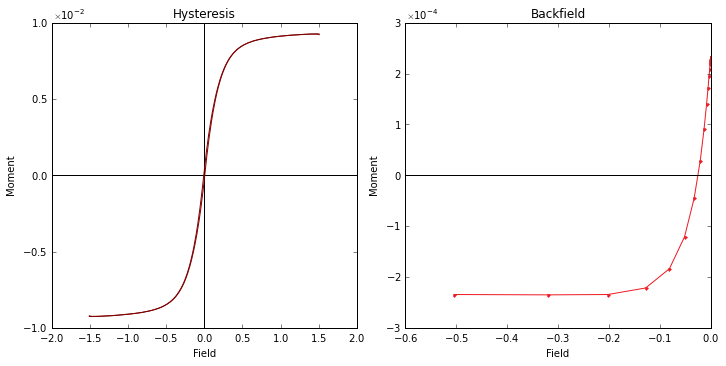

In [12]:
fig = RockPy3.Figure(fig_input=s) #create a figure
v1 = fig.add_visual(visual='hysteresis') # add a visual
# v1.add_feature('irreversible_data') # add an optional feature
v2 = fig.add_visual(visual='backfield') # add a second visual
fig.show() # display the figure

colors are give at the time of import:

+ colors according to the number of measurements in the sample
+ marker according to the number of samples in the study

but you can change colors and markers 

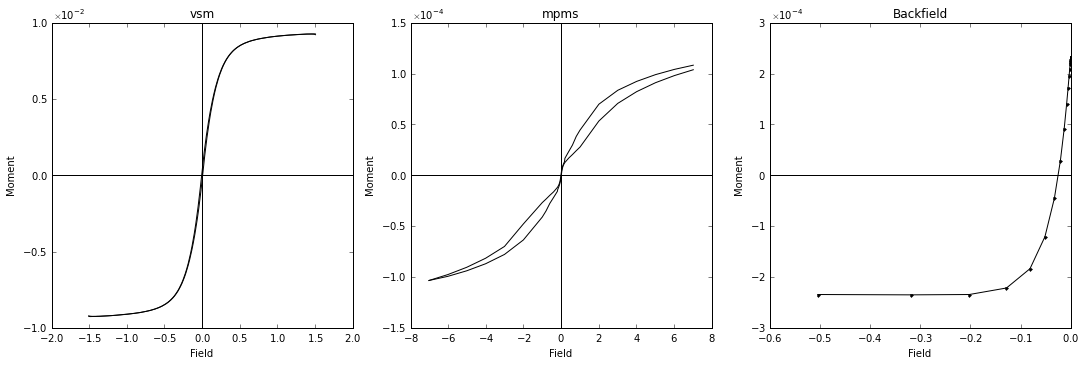

In [13]:
fig = RockPy3.Figure(fig_input=s) #create a figure
v1 = fig.add_visual(visual='hysteresis', color='k', title='vsm') # add a visual
vmpms = fig.add_visual(visual='hysteresis', color='k', visual_input=hys_mpms, title='mpms') # add a visual
# v1.add_feature('irreversible_data') # add an optional feature
v2 = fig.add_visual(visual='backfield', color='k', marker='.') # add a second visual
fig.show() # display the figure

#### paramagnetic correction

In [14]:
hys = s.get_measurement(mtype='hysteresis')[0]
hys_corrected = hys.correct_paramag()

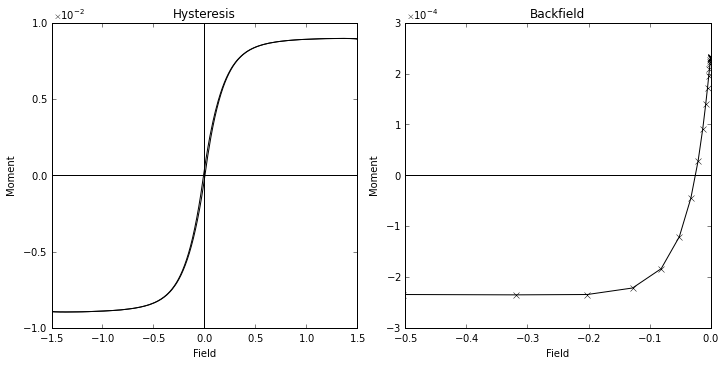

In [15]:
fig = RockPy3.Figure(fig_input=s)
v = fig.add_visual(visual='hysteresis', color='k', xlims=[-1.5,1.5])
v = fig.add_visual(visual='backfield', color = 'k', linestyle='-', marker ='x', xlims=[-0.5,0])
fig.show()

#### add day plot 
automatically calculates the appropriate results

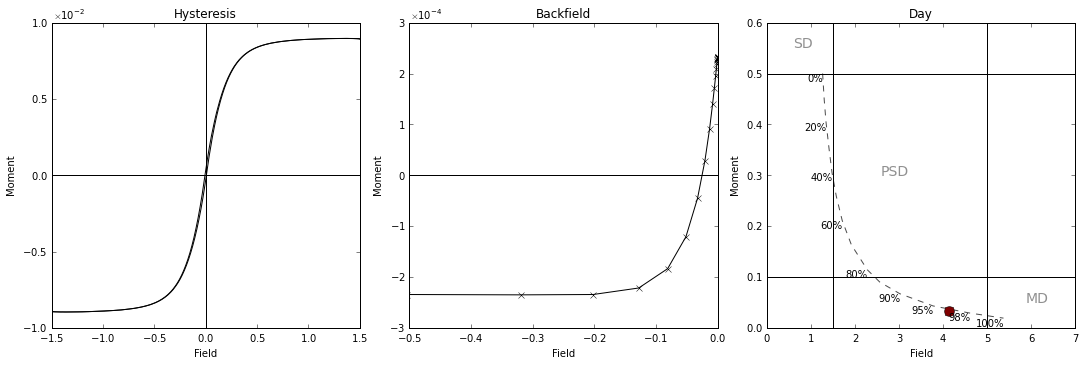

In [16]:
fig = RockPy3.Figure(fig_input=s)
v = fig.add_visual(visual='hysteresis', color='k', xlims=[-1.5,1.5])
#v.add_feature('irreversible_data', marker='', color='r') 
v = fig.add_visual(visual='backfield', color = 'k', linestyle='-', marker ='x', xlims=[-0.5,0])
v = fig.add_visual(visual='day', markersize=10, xlims=[0,7], marker='o')
v.add_feature(feature='sd_md_mixline_1', marker = '')
fig.show()

#### creating your own plot
you can add features to a plot, which overwrites the standard features with the ones you want

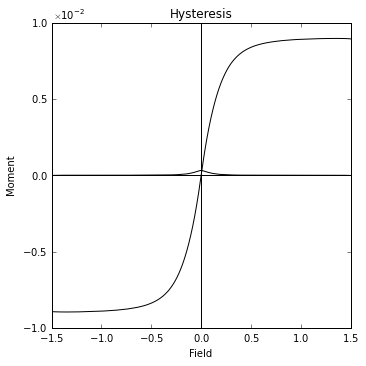

In [17]:
fig = RockPy3.Figure(fig_input=s)
v = fig.add_visual(visual='hysteresis', features=['zero_lines', 'irreversible_data', 'reversible_data'], 
                   color='k', xlims=[-1.5,1.5])
#v.add_feature('irreversible_data', marker='', color='r') 
fig.show()

### Example 2
#### the concept of series and simulated measurements

In [18]:
Study2 = RockPy3.RockPyStudy()

#### We add 1 sample. Each of the samples will get 20 simulated measurements.

Sample:
+ 4 x hys (Noise 0%)
+ 4 x hys (Noise 1%)
+ 4 x hys (Noise 2%)
+ 4 x hys (Noise 3%)
+ 4 x hys (Noise 4%)


In [19]:
# sample
s2 = Study2.add_sample(name='S2')
# noise ranging from 0-4%
for noise in range(5):
    # 4 measurements for each noise
    for n in range(4):
        h1 = s2.add_simulation(mtype='hysteresis', noise = noise, marker='o')
        # we add a series for the noise
        h1.add_series('noise', noise, '%')      

In [20]:
print(Study2.info())

20151209:1314
------------------  ---------------------------------------------
1 samples           S2
------------------  ----
20 measurements     hysteresis
                    1 series:
                    noise: 0.0[4], 1.0[4], 2.0[4], 3.0[4], 4.0[4]
------------------  ----

Sample Name      Sample Group     Measurements     series           Initial State
---------------  ---------------  ---------------  ---------------  ---------------
S2               none             20x hysteresis   noise            False
===============  ===============  ===============  ===============  ===============
                 S2               hysteresis [0]   noise [0.0]
                 S2               hysteresis [1]   noise [0.0]
                 S2               hysteresis [2]   noise [0.0]
                 S2               hysteresis [3]   noise [0.0]
                 S2               hysteresis [4]   noise [1.0]
                 S2               hysteresis [5]   noise [1.0]
                 

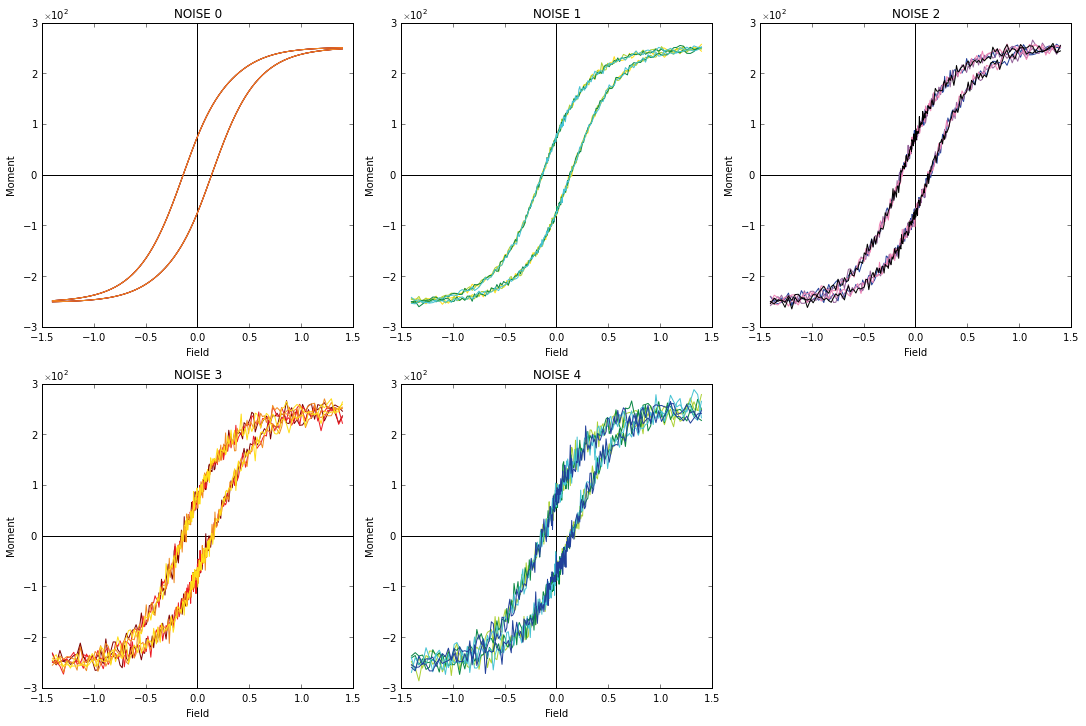

In [21]:
fig = RockPy3.Figure()
for val in Study2.stype_svals['noise']:
    v = fig.add_visual(visual='hysteresis', visual_input=Study2.get_measurement(stype='noise', sval=val),
                      title = 'NOISE %i'%val)
fig.show()

In [22]:
fig = RockPy3.Figure(fig_input=Study2)
v = fig.add_visual(visual='hysteresis')
v = fig.add_visual(visual='resultseries',result='ms', series='noise')
v = fig.add_visual(visual='resultseries',result='bc', series='noise')

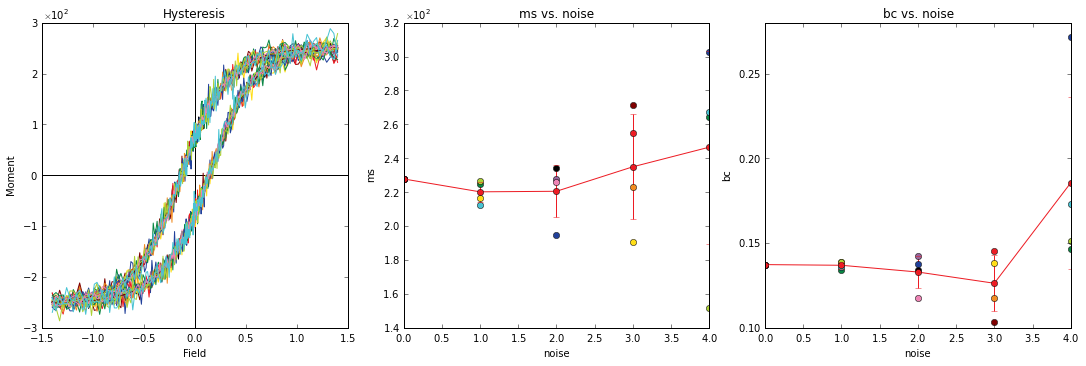

In [23]:
fig.show()

### Example 3
#### samplemeans, groupmeans

Lets create a study with 5 samples with 4 measurements each

In [24]:
Study3 = RockPy3.RockPyStudy()
#create 5 samples with 4 simulated hys measurements
for i in range(1,6):
    
    
    # add a sample
    s = Study3.add_sample(name='S'+str(i), samplegroup=str(i//2))
    
    
    # add 4 measurements
    m1 = s.add_simulation(mtype='hys', ms=i, noise=2)
    m2 = s.add_simulation(mtype='hys', ms=i, noise=2)
    m2 = s.add_simulation(mtype='hys', ms=i, noise=2)
    m2 = s.add_simulation(mtype='hys', ms=i, noise=2)
    
    # create a mean of all the measurements ( works for any type of measurement)
    mean = s.add_mean_measurements()
    
    # set color to magenta for all samplemeans
    mean[0].set_plt_prop('color', 'm')
    
study_mean = Study3.add_mean_sample(mean_of_mean=False)

# change color
study_mean.set_plt_prop('color', 'k')
# change linewidth
study_mean.set_plt_prop('linewidth', 3)

In [25]:
f = RockPy3.Figure(fig_input=Study3, columns=4)
v = f.add_visual(visual='hysteresis', plot_groupmean=False, plot_samplemean=False, plot_samplebase=True, plot_groupbase=True, plot_other=False, 
                 title='base measurements')
v = f.add_visual(visual='hysteresis', plot_groupmean=False, plot_samplemean=True, plot_samplebase=False, plot_groupbase=False, plot_other=False, 
                 title='Sample Means')
v = f.add_visual(visual='hysteresis', plot_groupmean=True, plot_samplemean=False, plot_samplebase=False, plot_groupbase=False, plot_other=False, 
                 title='Study Mean')
#v = f.add_visual(visual='hysteresis', plot_groupmean=True, plot_samplemean=False, plot_samplebase=True, plot_groupbase=True, plot_other=False, title='base measurements + groupmean')

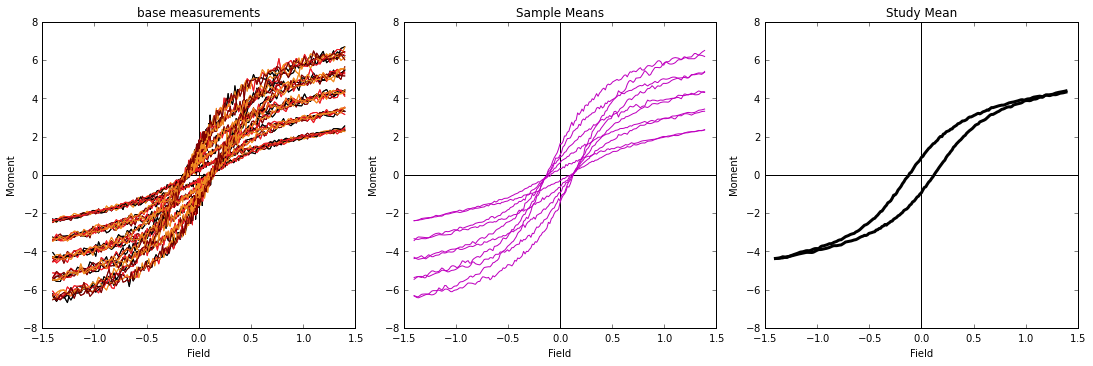

In [26]:
#f.show()
f.show(equal_lims=True)